## Q1. Read in the data and generate a file in which every row represents a transaction, with True identifying items that were part of that transaction, and False identifying items that were not (as in the example from class). Name the file groupxxtransactions01.csv, where xx is your group number

Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 400)

Read in the data and generate a file in which every row represents a transaction, with True identifying items that were part of that transaction, and False identifying items that were not

In [3]:
#read in csv
tran = pd.read_csv('transactions.csv')
tran.head()

,Transaction,Product
0,12359,Candy Bar
1,12362,Pain Reliever
2,12362,Pain Reliever
3,12365,Toothpaste
4,12371,Bow


In [4]:
#use crosstab, where Transactions are rows, Products are columns and values are count of products
test = pd.crosstab(tran["Transaction"], tran["Product"]).fillna(0).rename_axis(None, axis=1)
test

,Bow,Candy Bar,Deodorant,Greeting Cards,Magazine,Markers,Pain Reliever,Pencils,Pens,Perfume,Photo Processing,Prescription Med,Shampoo,Soap,Toothbrush,Toothpaste,Wrapping Paper
Transaction,,,,,,,,,,,,,,,,,
12359,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12362,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
12365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12371,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12380,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221845,0,0,0,1,3,0,0,0,1,0,1,0,0,0,0,4,0
1221854,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1221857,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
#rename dataframe
txp = pd.crosstab(tran["Transaction"], tran["Product"]).fillna(0).rename_axis(None, axis=1)
#turn values into boolean values
txp = txp.astype(bool)
txp.head()

,Bow,Candy Bar,Deodorant,Greeting Cards,Magazine,Markers,Pain Reliever,Pencils,Pens,Perfume,Photo Processing,Prescription Med,Shampoo,Soap,Toothbrush,Toothpaste,Wrapping Paper
Transaction,,,,,,,,,,,,,,,,,
12359,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12362,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
12365,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
12371,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12380,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
txp.to_csv('group01transactions01')

## Q2. Identify the frequent itemsets using a minimum support threshold of 5%. How many itemsets are frequent?

In [12]:
#support is the occurance in the total dataset 1% of the time. 
#Use apriori to find support.
fi = apriori(txp, min_support = 0.01, use_colnames = True) 
fi.sort_values(['support'], ascending =[False])

,support,itemsets
3,0.241305,(Magazine)
1,0.171005,(Candy Bar)
13,0.160425,(Toothpaste)
2,0.146885,(Greeting Cards)
6,0.143575,(Pens)
5,0.134925,(Pencils)
7,0.089960,(Perfume)
12,0.067350,(Toothbrush)
8,0.058480,(Photo Processing)
0,0.054645,(Bow)


**25 itemsets (with more than one item in them) are frequent.***

## Q3. Identify all association rules with a minimum confidence of 10%. How many rules are generated?

In [8]:
#find association rules with a confidence = 10%
rules = association_rules(fi, metric ="confidence", min_threshold = 0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bow),(Toothbrush),0.054645,0.067350,0.011340,0.207521,3.081236,0.007660,1.176877
1,(Toothbrush),(Bow),0.067350,0.054645,0.011340,0.168374,3.081236,0.007660,1.136755
2,(Greeting Cards),(Candy Bar),0.146885,0.171005,0.043660,0.297239,1.738191,0.018542,1.179626
3,(Candy Bar),(Greeting Cards),0.171005,0.146885,0.043660,0.255314,1.738191,0.018542,1.145604
4,(Magazine),(Candy Bar),0.241305,0.171005,0.040535,0.167982,0.982325,-0.000729,0.996367
5,(Candy Bar),(Magazine),0.171005,0.241305,0.040535,0.237040,0.982325,-0.000729,0.994410
6,(Pencils),(Candy Bar),0.134925,0.171005,0.033015,0.244691,1.430903,0.009942,1.097558
7,(Candy Bar),(Pencils),0.171005,0.134925,0.033015,0.193065,1.430903,0.009942,1.072050
8,(Candy Bar),(Toothpaste),0.171005,0.160425,0.039780,0.232625,1.450053,0.012347,1.094087
9,(Toothpaste),(Candy Bar),0.160425,0.171005,0.039780,0.247966,1.450053,0.012347,1.102338


**50 rules with a confidence = 10% are generated.**

## Q4. Which rules have the highest lift? Using the results from the previous questions, show exactly how this lift value was calculated for one of the rules with highest lift.

In [50]:
rules_sort = rules.sort_values(['lift'], ascending =[False])
rules_sort.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,(Perfume),(Toothbrush),0.089960,0.067350,0.021820,0.242552,3.601370,0.015761,1.231306
27,(Toothbrush),(Perfume),0.067350,0.089960,0.021820,0.323979,3.601370,0.015761,1.346172
0,(Bow),(Toothbrush),0.054645,0.067350,0.011340,0.207521,3.081236,0.007660,1.176877
1,(Toothbrush),(Bow),0.067350,0.054645,0.011340,0.168374,3.081236,0.007660,1.136755
31,(Greeting Cards),"(Magazine, Candy Bar)",0.146885,0.040535,0.016665,0.113456,2.798966,0.010711,1.082253


For the rule: {perfume} --> {toothbrush}, lift is calculated as:

In [51]:
conf_r=float(rules_sort.iloc[0]['confidence'])
supp_con=float(rules_sort.iloc[0]['consequent support'])
conf_r/supp_con

3.6013696427976076

For the rule: {toothbrush} --> {perfume}, lift is calculated as:

In [52]:
conf_r2=float(rules_sort.iloc[1]['confidence'])
supp_con2=float(rules_sort.iloc[1]['consequent support'])
conf_r2/supp_con2

3.601369642797607

5. For the same rule, show how leverage and conviction were obtained.

For rule #27, where {perfume} --> {toothbrush}

leverage = support(rule#27) -[support(toothbrush)*support(perfume)]

In [58]:
#leverage = support(rule#27) -[support(toothbrush)*support(perfume)]
sup_both=float(rules_sort.iloc[0]['support'])
sup_toothbrush=float(rules_sort.iloc[0]['consequent support'])
sup_perfume=float(rules_sort.iloc[0]['antecedent support'])
(sup_both)-sup_toothbrush*sup_perfume

0.015761194

Formula: conviction = [1-support(toothbrush)]/[1-confidence(rule#27)]

In [59]:
a=(1-sup_toothbrush)
b=(1-conf_r)
round((a/b),6)

1.231306

For rule #26, where {toothbrush} --> {perfume}:

leverage = support(rule#26) -[support(perfume)*support(toothbrush)]

In [61]:
sup_r26=float(rules_sort.iloc[1]['support'])
sup_r26-sup_toothbrush*sup_perfume

0.015761194

Formula: conviction = [1-support(perfume)]/[1-confidence(rule#26)

In [62]:
a=(1-sup_perfume)
b=(1-conf_r2)
round((a/b),6)

1.346172

## Q6. Interpret and discuss the top 5 rulesfor each below.  If there are more than five meeting the required criterion, pick any five. Are any of these surprising? Comment on the extent of their redundancy and utility.

### a) the highest confidence

In [22]:
rules_sort = rules.sort_values(['confidence'], ascending =[False])
rules_sort.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
42,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947
29,"(Greeting Cards, Magazine)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344
39,"(Magazine, Toothpaste)",(Candy Bar),0.031665,0.171005,0.013720,0.433286,2.533762,0.008305,1.462810
30,"(Magazine, Candy Bar)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723
33,"(Greeting Cards, Toothpaste)",(Candy Bar),0.032080,0.171005,0.013175,0.410692,2.401637,0.007689,1.406726


Some insights we can gather from these results are:

- The same 4 items appear several times in the top 5 rules, sometimes simply switching up what is considered an antecedent versus a consequent.
- 5/5 of these rules include a Candy Bar. Candy Bars appear in 17% of the transactions. 
- Magazines, Greeting Cards and Toothpaste each appear in 3/5 rules. 
- The most frequently bought items in the store are Magazines (24%), Candy Bars (17%), Toothpaste (16%), and Greeting Cards (15%), in that order. 
- While their frequency could be alarming, we can notice that the confidence of each rule (range: 0.41-0.46) is usually higher than the support of the consequents. So, these rules are likely helping us make correct associations and increase the chance of purchasing the consequents to ~40%. 
- Lift is >1 in all rules – hence, we can assume they all have a positive correlation. 
- Conviction ranges from 1.4-1.55. This tells us that, when we assume the antecedents and consequents of the rules above are related, if these two events are actually independent, we’d be wrong about 1.4-1.55 times more often. 

### b) the highest lift

In [63]:
#we have to mannually pick the top 5 since we have several ties. 
rules_sort = rules.sort_values(['lift'], ascending =[False])
rules_sort.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,(Perfume),(Toothbrush),0.089960,0.067350,0.021820,0.242552,3.601370,0.015761,1.231306
27,(Toothbrush),(Perfume),0.067350,0.089960,0.021820,0.323979,3.601370,0.015761,1.346172
0,(Bow),(Toothbrush),0.054645,0.067350,0.011340,0.207521,3.081236,0.007660,1.176877
1,(Toothbrush),(Bow),0.067350,0.054645,0.011340,0.168374,3.081236,0.007660,1.136755
31,(Greeting Cards),"(Magazine, Candy Bar)",0.146885,0.040535,0.016665,0.113456,2.798966,0.010711,1.082253
30,"(Magazine, Candy Bar)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723
42,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947
29,"(Greeting Cards, Magazine)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344
49,"(Magazine, Toothpaste)",(Greeting Cards),0.031665,0.146885,0.011945,0.377230,2.568202,0.007294,1.369873
39,"(Magazine, Toothpaste)",(Candy Bar),0.031665,0.171005,0.013720,0.433286,2.533762,0.008305,1.462810


In [36]:
#drop redundant lines
rules_sort=rules_sort.drop([27,1,30])
rules_sort.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,(Perfume),(Toothbrush),0.089960,0.067350,0.021820,0.242552,3.601370,0.015761,1.231306
0,(Bow),(Toothbrush),0.054645,0.067350,0.011340,0.207521,3.081236,0.007660,1.176877
31,(Greeting Cards),"(Magazine, Candy Bar)",0.146885,0.040535,0.016665,0.113456,2.798966,0.010711,1.082253
42,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947
29,"(Greeting Cards, Magazine)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344


Some insights we can gather from these results are:
- Candy Bars appear in 3/5 rules as a consequent. 
- Toothbrushes appear in 2/5 rules. 
- Magazines appear in 2/5 rules. 
- Candy Bars and Magazines items are some of the most frequently sold items at the store. 
- Lift is >1 in all rules – hence, we can assume they all have a positive correlation.  
- Confidence is higher than the consequent support – this means that anytime the antecedents are purchased, the chance of the consequent getting purchased increases. 
- This is the second time that Rule #42, where {pencils, toothpaste}  {candy bar} (appeared as Rule #41 in previous sort), makes an appearance. 
- Rule #29, where {greeting cards, magazines}{candy bar}, also made an appearance in the last sort (as Rule #28)

### c) the highest leverage

In [64]:
#mannually pick the top 5 since there are ties
rules_sort = rules.sort_values(['leverage'], ascending =[False])
rules_sort.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Greeting Cards),(Candy Bar),0.146885,0.171005,0.043660,0.297239,1.738191,0.018542,1.179626
3,(Candy Bar),(Greeting Cards),0.171005,0.146885,0.043660,0.255314,1.738191,0.018542,1.145604
26,(Perfume),(Toothbrush),0.089960,0.067350,0.021820,0.242552,3.601370,0.015761,1.231306
27,(Toothbrush),(Perfume),0.067350,0.089960,0.021820,0.323979,3.601370,0.015761,1.346172
8,(Candy Bar),(Toothpaste),0.171005,0.160425,0.039780,0.232625,1.450053,0.012347,1.094087
9,(Toothpaste),(Candy Bar),0.160425,0.171005,0.039780,0.247966,1.450053,0.012347,1.102338
30,"(Magazine, Candy Bar)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723
31,(Greeting Cards),"(Magazine, Candy Bar)",0.146885,0.040535,0.016665,0.113456,2.798966,0.010711,1.082253
29,"(Greeting Cards, Magazine)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344
6,(Pencils),(Candy Bar),0.134925,0.171005,0.033015,0.244691,1.430903,0.009942,1.097558


In [39]:
#drop redundant rows
rules_sort=rules_sort.drop([3,27,9,31])
rules_sort.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Greeting Cards),(Candy Bar),0.146885,0.171005,0.043660,0.297239,1.738191,0.018542,1.179626
26,(Perfume),(Toothbrush),0.089960,0.067350,0.021820,0.242552,3.601370,0.015761,1.231306
8,(Candy Bar),(Toothpaste),0.171005,0.160425,0.039780,0.232625,1.450053,0.012347,1.094087
30,"(Magazine, Candy Bar)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723
29,"(Greeting Cards, Magazine)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344


- Some insights we can gather from these results are:
- Candy Bar appears in 4/5 rules. 
- Greeting Cards appear in 3/5 rules.
- It is now the third time that Rule #29 makes an appearance.
- Rule #26 has a high lift result, and is showing up for the second time in our analysis. 
- Rule #26 {Perfume} --> {Toothbrush} is an interesting rule because it includes items we have not encountered in our top association rules yet. 
- Both of these items are less frequently purchased than the other products that consistently show up in our analysis. For instance, toothbrushes are bought about 7% of the time. But when someone has bought perfume, the chance of a toothbrush purchase more than triples, to 24%. 
- While we do not have access to the prices of these items, we must recognize that perfumes are often pricier than toothbrushes (definitely pricier than the top 4 products, like candy bars or magazines). Hence, this rule is extra appealing due to its sale of a higher-end product.
- Through a more practical lens, we noticed that toothpaste and perfume fall within the realm of “self-care” and “hygiene.” A person who takes care of their dental hygiene enough to get a new toothbrush is likely to also care about other aspects of their hygiene, like their perceived smell. Hence, a rational hypothesis is that the customers who buy perfume and toothbrushes could also be interested. 

### d) the highest conviction

In [47]:
rules_sort = rules.sort_values(['conviction'], ascending =[False])
rules_sort.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
42,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947
29,"(Greeting Cards, Magazine)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344
39,"(Magazine, Toothpaste)",(Candy Bar),0.031665,0.171005,0.013720,0.433286,2.533762,0.008305,1.462810
30,"(Magazine, Candy Bar)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723
33,"(Greeting Cards, Toothpaste)",(Candy Bar),0.032080,0.171005,0.013175,0.410692,2.401637,0.007689,1.406726


Some insights we can gather from these results are:
- We have seen every single one of these rules before in our analysis. In fact, these rules include only the top 5 most frequently sold products in the store. 
- Most of these rules have Candy Bar as their consequent.
- Confidence is higher than the consequent support for every single one of these rules. Hence, the consequents have a better chance of being purchased when they are bundled with the antecedents than when they are not. 

Overall, we reviewed a little less than 20 rules. Most of these 20 rules included the same 4 products (Magazine, Candy Bar, Toothpaste, Greeting Cards) which are the ones that are most frequently purchased. Hence, it feels redundant to utilize 10+ rules trying to predict the sale of a Candy Bar or a Magazine when it is already likely that they will purchase it. 

## Q7. Do any of these metrics seem preferable to the others for this dataset? Discuss why or why not.

Some of these metrics are very helpful in determining the strength of the rules from association mining. For instance, confidence has allowed us to spot the most significant rules. It is especially helpful when contrasting confidence to the support of consequent to assess whether or not the rule is helping us make a good assumption. 

However, not all metrics are useful for this particular dataset. For instance, lift is not as informative due to the fact that about 80% of rules have a lift >1, which tells us the correlation between antecedents and consequents is positive for most items. Furthermore, while conviction and leverage intend to test the (in)dependence of the antecedents and consequents, we found them to be less informative than we had wished as not many of the rules fell into the independent bucket. 

## Q8. If you were in charge of these departments, how would you use the results of this analysis to come up with a strategic plan? Explain your reasoning. This question is open ended, and I am looking for innovative thinking.

If we were in charge of these departments, we would institute a two-pronged strategic plan.

The first part of the plan would be to maximize our best-selling products by physically placing them with each other. Our analysis has proven, time and time again, that the top 5 most frequently sold products have considerable synergies. So, as a first step, we would try to exploit these natural bundles. Candy Bars and Magazines are famously placed at the checkout so that people can shop for cheaper items while they wait. Hence, we suggest, as an experiment and first step, placing greeting cards near the cashiers as well. If this experiment were to increase the sale of greeting cards, we would then try placing similar stands at strategic locations around the store where traffic is slower. For instance, the photo processing or prescription medication areas in the store could satisfy these requirements. 

The second part of this strategic plan is to look at bundles that include less frequently sold items, like perfume, toothbrushes, or shampoo. These items are substantially different to the top selling products. While Candy Bars, Magazines and Greeting Cards are “consumed” fast—and can, then, be purchased more often—self-care products like soap, shampoo or perfume take time to be consumed. They require, not an impulse small purchase, but loyal customers that consistently purchase these items. Hence, we suggest creating some coupons that encourage the purchase of one of these “long-term” products to anyone who buys these less frequent, “long-term” products. We would like to create a habit in our customers of investing in long-term products, which might even encourage them to buy other “long-term” products. 


# Part 2: CLUSTERING CUSTOMERS

## Q1. Notice that region is categorical; we need to do what is referred to as “one-hot encoding” – convert it into separate (binary) variables, one for each possible value of region. So, you will need to create 4 new variables, corresponding to inner city, town, rural, and suburban (a 1 in a column would represent being from the associated region). You can do this either explicitly by writing your own code, or by using the OneHotEncoder option available in sklearn (preprocessing). Read in the data, create the four new columns and drop region. 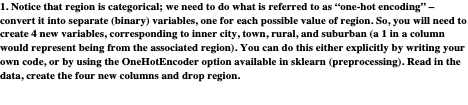

In [16]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as hc #heirarchical cluster
from sklearn.cluster import KMeans as km #k-means cluster

from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import fcluster #flat cluster

In [66]:
import seaborn as sns

In [19]:
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 400)

Read in the data and generate a file in which every row represents a transaction, with True identifying items that were part of that transaction, and False identifying items that were not

In [20]:
bank = pd.read_csv('bankcustomers.csv', index_col=0)
bank.head()

,id,age,sex,region,income,married,children,car,savings,checking,mortgage,pep
0,ID12101,48,1,1,17546.0,0,1,0,0,0,0,1
1,ID12102,40,0,2,30085.1,1,3,1,0,1,1,0
2,ID12103,51,1,1,16575.4,1,0,1,1,1,0,0
3,ID12104,23,1,2,20375.4,1,3,0,0,1,0,0
4,ID12105,57,1,3,50576.3,1,0,0,1,0,0,0


In [21]:
bank.shape

(600, 12)

In [22]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        600 non-null    object 
 1   age       600 non-null    int64  
 2   sex       600 non-null    int64  
 3   region    600 non-null    int64  
 4   income    600 non-null    float64
 5   married   600 non-null    int64  
 6   children  600 non-null    int64  
 7   car       600 non-null    int64  
 8   savings   600 non-null    int64  
 9   checking  600 non-null    int64  
 10  mortgage  600 non-null    int64  
 11  pep       600 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 60.9+ KB


In [23]:
bank.isna().sum()

id          0
age         0
sex         0
region      0
income      0
married     0
children    0
car         0
savings     0
checking    0
mortgage    0
pep         0
dtype: int64

In [24]:
bank.head()

,id,age,sex,region,income,married,children,car,savings,checking,mortgage,pep
0,ID12101,48,1,1,17546.0,0,1,0,0,0,0,1
1,ID12102,40,0,2,30085.1,1,3,1,0,1,1,0
2,ID12103,51,1,1,16575.4,1,0,1,1,1,0,0
3,ID12104,23,1,2,20375.4,1,3,0,0,1,0,0
4,ID12105,57,1,3,50576.3,1,0,0,1,0,0,0


Notice that region is categorical; we need to do what is referred to as \one-hot encoding" { convert it into separate (binary) variables, one for each possible value of region. So you will need to create 4 new variables, corresponding to inner city, town, rural, and suburban (a 1 in a column would represent being from the associated region). You can do this either explicitly by writing your own code, or by using the OneHotEncoder option available in sklearn (preprocessing). Read in the data, create the four new columns and drop region.


Using get dummies

In [25]:
test1 = bank.copy()
regionsL = {1:"innerCity",
           2:"town",
           3:"rural",
           4:"subarban"}
test1["region"] = test1["region"].map(regionsL)
test1.head()

,id,age,sex,region,income,married,children,car,savings,checking,mortgage,pep
0,ID12101,48,1,innerCity,17546.0,0,1,0,0,0,0,1
1,ID12102,40,0,town,30085.1,1,3,1,0,1,1,0
2,ID12103,51,1,innerCity,16575.4,1,0,1,1,1,0,0
3,ID12104,23,1,town,20375.4,1,3,0,0,1,0,0
4,ID12105,57,1,rural,50576.3,1,0,0,1,0,0,0


In [26]:
test2 = pd.get_dummies(test1.region, prefix='region')
test2.head()

,region_innerCity,region_rural,region_subarban,region_town
0,1,0,0,0
1,0,0,0,1
2,1,0,0,0
3,0,0,0,1
4,0,1,0,0


In [27]:
test3 = pd.concat([test1,test2],axis =1)
test3.head()

,id,age,sex,region,income,married,children,car,savings,checking,mortgage,pep,region_innerCity,region_rural,region_subarban,region_town
0,ID12101,48,1,innerCity,17546.0,0,1,0,0,0,0,1,1,0,0,0
1,ID12102,40,0,town,30085.1,1,3,1,0,1,1,0,0,0,0,1
2,ID12103,51,1,innerCity,16575.4,1,0,1,1,1,0,0,1,0,0,0
3,ID12104,23,1,town,20375.4,1,3,0,0,1,0,0,0,0,0,1
4,ID12105,57,1,rural,50576.3,1,0,0,1,0,0,0,0,1,0,0


In [28]:
# drop region
test3.drop("region",axis =1, inplace = True)
test3.head()

,id,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_innerCity,region_rural,region_subarban,region_town
0,ID12101,48,1,17546.0,0,1,0,0,0,0,1,1,0,0,0
1,ID12102,40,0,30085.1,1,3,1,0,1,1,0,0,0,0,1
2,ID12103,51,1,16575.4,1,0,1,1,1,0,0,1,0,0,0
3,ID12104,23,1,20375.4,1,3,0,0,1,0,0,0,0,0,1
4,ID12105,57,1,50576.3,1,0,0,1,0,0,0,0,1,0,0


## 2. Apply hierarchical clustering to the dataset. Do you see any clear clusters? How many clusters would you recommend, and why? What are some distinguishing characteristics of each cluster?

In [29]:
# drop id since its of no use
test3.drop("id", axis =1 , inplace = True)
test3.head()

,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_innerCity,region_rural,region_subarban,region_town
0,48,1,17546.0,0,1,0,0,0,0,1,1,0,0,0
1,40,0,30085.1,1,3,1,0,1,1,0,0,0,0,1
2,51,1,16575.4,1,0,1,1,1,0,0,1,0,0,0
3,23,1,20375.4,1,3,0,0,1,0,0,0,0,0,1
4,57,1,50576.3,1,0,0,1,0,0,0,0,1,0,0


(array([ 32., 106., 110., 108.,  76.,  62.,  35.,  36.,  21.,  14.]),
 array([ 5014.21 , 10825.799, 16637.388, 22448.977, 28260.566, 34072.155,
        39883.744, 45695.333, 51506.922, 57318.511, 63130.1  ]),
 <a list of 10 Patch objects>)

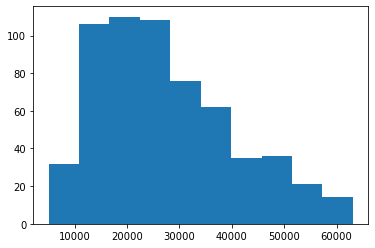

In [69]:
# Lets check income
plt.hist(test3["income"])

We can see that it is right skewed.Also, since these values are range in 10k-60k, they will skew our entire dataset. We need to apply a log transformation on this data. 

(array([  2.,  10.,  20.,  48.,  79.,  98., 118.,  99.,  75.,  51.]),
 array([ 8.52003116,  8.77332334,  9.02661552,  9.2799077 ,  9.53319988,
         9.78649206, 10.03978424, 10.29307642, 10.5463686 , 10.79966078,
        11.05295296]),
 <a list of 10 Patch objects>)

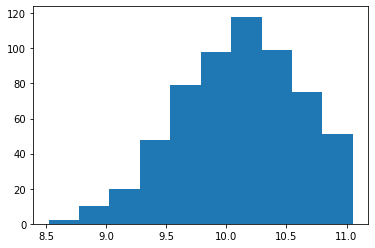

In [67]:
log_df = test3.copy()
log_df.income = np.log(log_df["income"])
plt.hist(log_df["income"])

In [33]:
# normalise
nbb = normalize(log_df)
nbb = pd.DataFrame(nbb, columns = log_df.columns)
nbb

,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_innerCity,region_rural,region_subarban,region_town
0,0.979082,0.020398,0.199337,0.000000,0.020398,0.000000,0.000000,0.000000,0.000000,0.020398,0.020398,0.000000,0.0,0.000000
1,0.964392,0.000000,0.248615,0.024110,0.072329,0.024110,0.000000,0.024110,0.024110,0.000000,0.000000,0.000000,0.0,0.024110
2,0.981242,0.019240,0.186930,0.019240,0.000000,0.019240,0.019240,0.019240,0.000000,0.000000,0.019240,0.000000,0.0,0.000000
3,0.908837,0.039515,0.392068,0.039515,0.118544,0.000000,0.000000,0.039515,0.000000,0.000000,0.000000,0.000000,0.0,0.039515
4,0.981837,0.017225,0.186570,0.017225,0.000000,0.000000,0.017225,0.000000,0.000000,0.000000,0.000000,0.017225,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.983520,0.016123,0.173461,0.000000,0.032247,0.016123,0.016123,0.016123,0.016123,0.000000,0.016123,0.000000,0.0,0.000000
596,0.953358,0.031779,0.291633,0.031779,0.000000,0.031779,0.031779,0.031779,0.000000,0.000000,0.031779,0.000000,0.0,0.000000
597,0.951852,0.030705,0.297189,0.030705,0.000000,0.030705,0.030705,0.000000,0.000000,0.030705,0.000000,0.000000,0.0,0.030705
598,0.947343,0.000000,0.313486,0.032667,0.000000,0.000000,0.032667,0.000000,0.032667,0.000000,0.032667,0.000000,0.0,0.000000


In [34]:
clstr1 = hc.linkage(nbb, method = "centroid", metric ="euclidean")

In [35]:
clstr1[0] 
# cluster 139 & 398 that were merged//  distance between the 2(euclidean) // no of records

array([1.39000000e+02, 3.98000000e+02, 5.87354811e-04, 2.00000000e+00])

## Centroid Linkage Distance

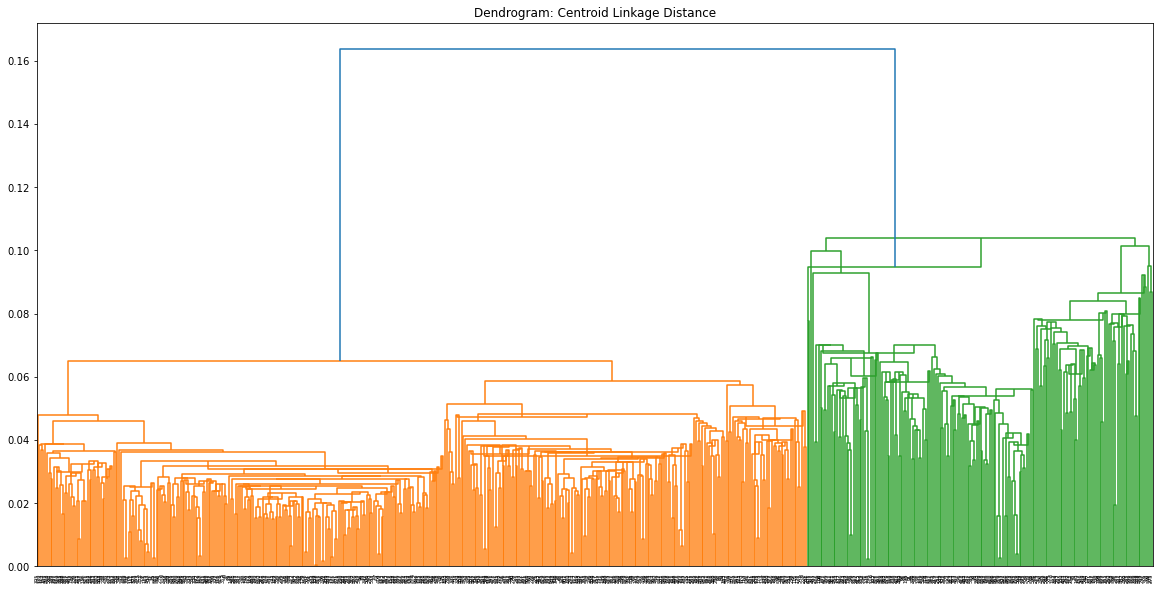

In [36]:
plt.figure(figsize=(20, 10))
plt.title("Dendrogram: Centroid Linkage Distance")
dgnbb1 = hc.dendrogram(clstr1)
plt.show()

When using centroid linkage distance we find 2 distinct clusters with large distances between the two centroids. This is a decent cluster, but we'll look into the next 4 before making a decision.

In [37]:
max(clstr1[:,2])

0.16385555795538312

In [38]:
0.7* max(clstr1[:,2])

0.11469889056876817

## Single Linkage method

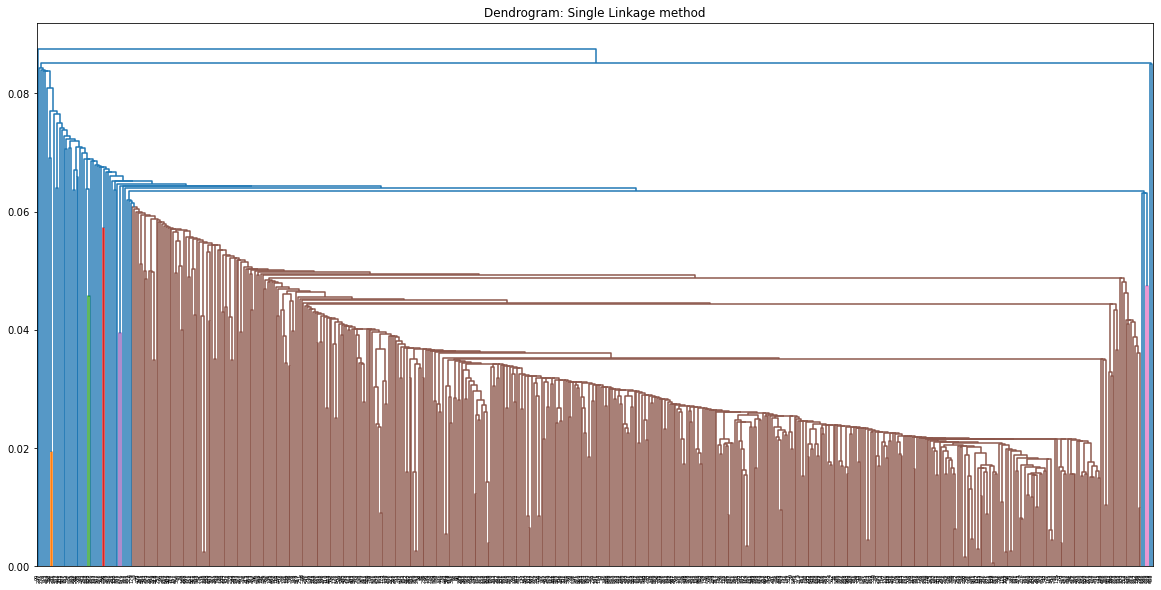

In [39]:
clstr2 = hc.linkage(nbb, method= 'single' , metric="euclidean")
plt.figure(figsize=(20, 10))
plt.title("Dendrogram: Single Linkage method")
dgnbb2 = hc.dendrogram(clstr2)

This is by far the **worst possible cluster**.
This cluster seems to have very disproportionate clusters with most of the reconds falling into a single cluster.
Usually such clusters tend not to be particularly usleful.

## Complete Linkage Distance

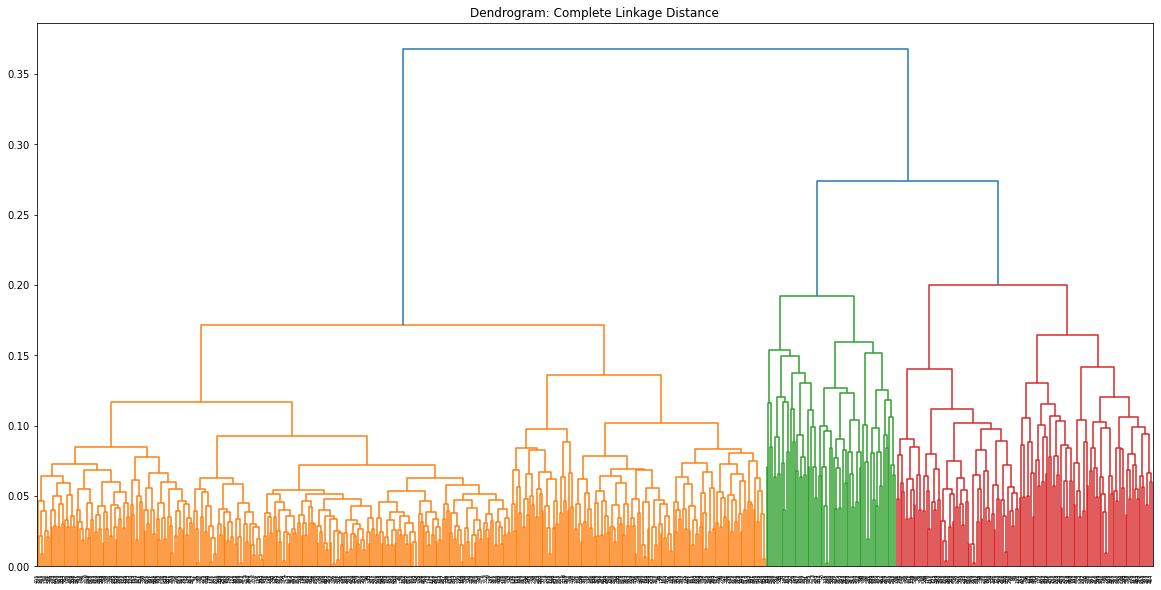

In [43]:
clstr3 = hc.linkage(nbb, method= 'complete' , metric="euclidean")
plt.figure(figsize=(20, 10))
plt.title("Dendrogram: Complete Linkage Distance")
dgnbb3 = hc.dendrogram(clstr3)

This is a **very good cluster**. It gives us more insights that the previous 2 clusters.The 3 clusters show distinct dissimilarities.

## Average Linkage Distance

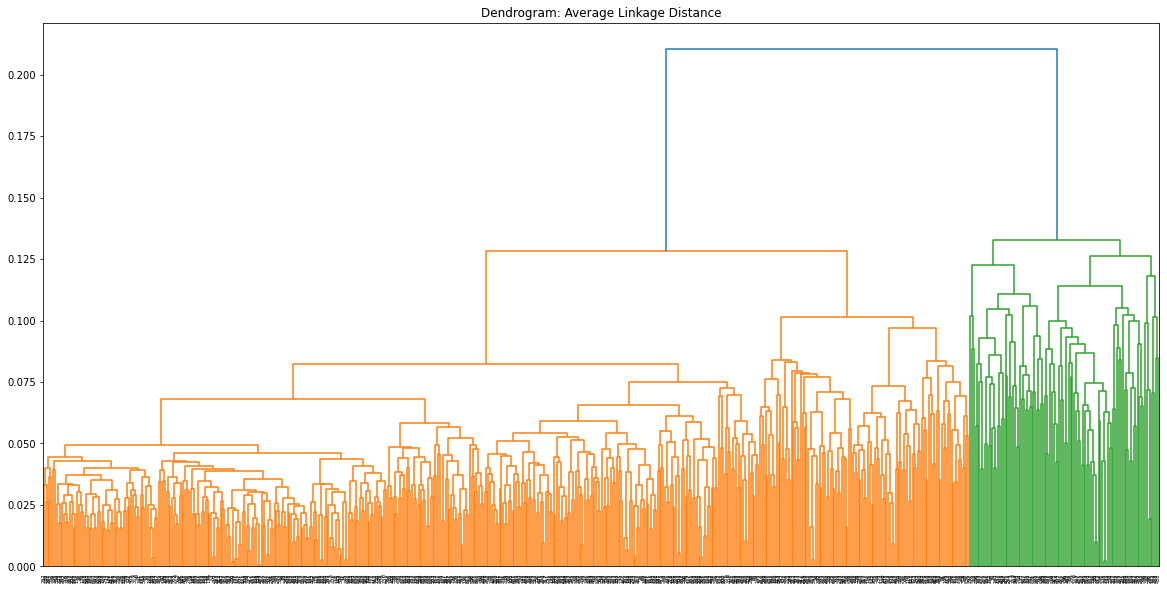

In [44]:
clstr4 = hc.linkage(nbb, method= 'average' , metric="euclidean")
plt.figure(figsize=(20, 10))
plt.title("Dendrogram: Average Linkage Distance")
dgnbb4 = hc.dendrogram(clstr4)

This cluster seems to have been skewed towards one cluster. It is still better than the centroid & single linkage clusters.

## Ward Linkage Distance

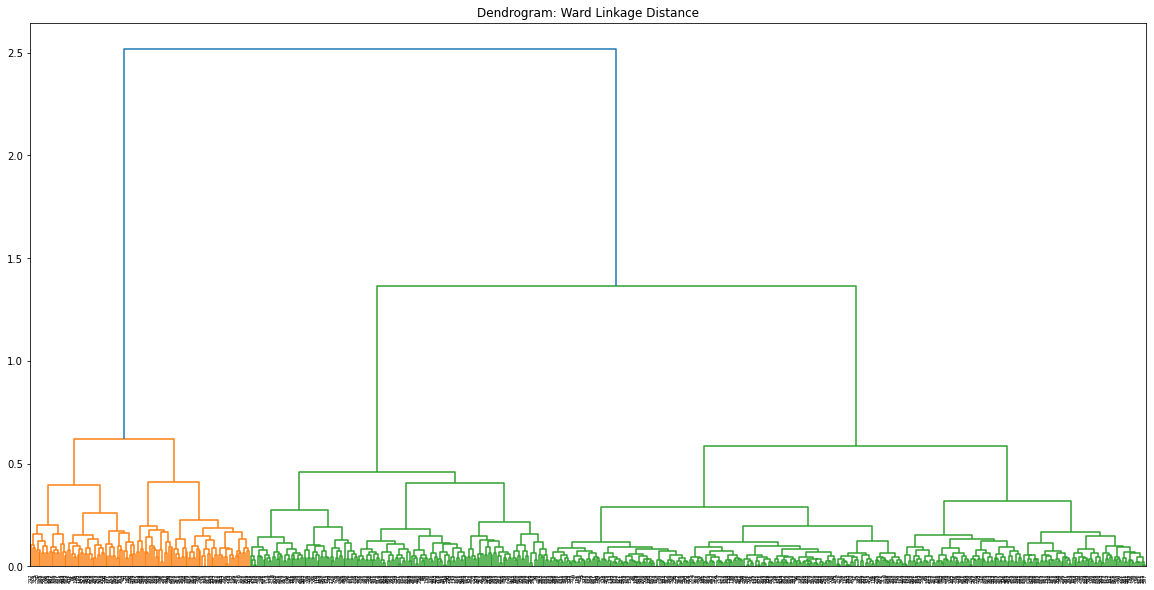

In [45]:
clstr5 = hc.linkage(nbb, method= 'ward' , metric="euclidean")
plt.figure(figsize=(20, 10))
plt.title("Dendrogram: Ward Linkage Distance")
dgnbb5 = hc.dendrogram(clstr5)


This is the absolutely best cluster since intra cluster distance is minimum and the inter cluster distance is maximum amongst all the othe clusters, we will chose this out of the 5 dendrograms. 

In [46]:
max(clstr5[:,2])

2.5191040299303378

In [47]:
0.7* max(clstr5[:,2])

1.7633728209512363

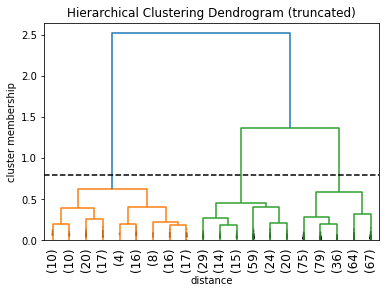

In [48]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.ylabel("cluster membership")
plt.xlabel('distance')
hc.dendrogram(clstr5, truncate_mode='lastp', p=20, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12.,show_contracted= True)
plt.axhline(y=0.8, color='black', linestyle='--')
plt.show()

In [49]:
maxdist = 0.8
clusters =fcluster(clstr5,maxdist,criterion="distance")
clusters

array([3, 2, 3, 1, 3, 3, 1, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3,
       3, 2, 1, 3, 3, 2, 2, 3, 3, 1, 3, 2, 3, 2, 1, 2, 3, 3, 3, 3, 3, 2,
       1, 3, 3, 2, 3, 3, 1, 2, 3, 3, 3, 3, 3, 1, 2, 2, 3, 3, 3, 1, 1, 3,
       1, 3, 2, 2, 1, 1, 2, 3, 3, 3, 3, 3, 2, 3, 3, 1, 2, 2, 3, 2, 1, 3,
       2, 3, 2, 1, 3, 3, 3, 1, 1, 2, 2, 1, 3, 2, 3, 3, 3, 2, 3, 1, 1, 2,
       2, 2, 3, 2, 3, 3, 3, 1, 2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 1, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 1, 3, 2, 1, 3, 1, 3, 3, 3, 2,
       3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 2, 3, 3, 1, 2, 2, 3, 3,
       2, 2, 3, 3, 1, 3, 3, 3, 2, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       1, 1, 3, 3, 3, 2, 1, 1, 3, 1, 3, 2, 3, 3, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3,
       3, 2, 3, 3, 1, 1, 2, 2, 3, 3, 1, 3, 1, 3, 3, 1, 2, 2, 1, 2, 2, 3,
       1, 1, 3, 3, 3, 1, 3, 3, 2, 2, 3, 1, 3, 1, 3, 2, 2, 1, 3, 2, 1, 2,
       2, 3, 2, 3, 1, 3, 3, 2, 3, 2, 3, 1, 3, 1, 1,

In [50]:
hclustfinal = test3.copy()
hclustfinal['CLUSTER'] =clusters.tolist()
hclustfinal

,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_innerCity,region_rural,region_subarban,region_town,CLUSTER
0,48,1,17546.00,0,1,0,0,0,0,1,1,0,0,0,3
1,40,0,30085.10,1,3,1,0,1,1,0,0,0,0,1,2
2,51,1,16575.40,1,0,1,1,1,0,0,1,0,0,0,3
3,23,1,20375.40,1,3,0,0,1,0,0,0,0,0,1,1
4,57,1,50576.30,1,0,0,1,0,0,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,1,47025.00,0,2,1,1,1,1,0,1,0,0,0,3
596,30,1,9672.25,1,0,1,1,1,0,0,1,0,0,0,2
597,31,1,15976.30,1,0,1,1,0,0,1,0,0,0,1,2
598,29,0,14711.80,1,0,0,1,0,1,0,1,0,0,0,2


In [51]:
hclustfinal2 = hclustfinal.groupby("CLUSTER",as_index =False).mean()
hclustfinal2

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_innerCity,region_rural,region_subarban,region_town
0,1,22.584746,0.457627,14913.646441,0.661017,1.186441,0.406780,0.610169,0.847458,0.338983,0.330508,0.508475,0.186441,0.101695,0.203390
1,2,34.316770,0.478261,22748.106522,0.652174,0.968944,0.534161,0.614907,0.695652,0.397516,0.440994,0.416149,0.093168,0.080745,0.409938
2,3,53.728972,0.526480,34555.025857,0.663551,0.968847,0.504673,0.757009,0.757009,0.327103,0.510903,0.442368,0.183801,0.115265,0.258567


Cluster 1: represented the young population 

Cluster 2: represented the middle-aged  

Cluster 3: represented the people nearing their retirement age of 60. 

The clustering method we picked ("WARD LINKAGE METHOD") was the best amongst all of them.</br>
Reason: Max inter-cluster distance & minimum datapoint distance.

In this cluster we found that 
- more middle-aged people tend to have a car than old people in general.
- Older people massively preferred having a savings account over the other clusters while on the other hand the youths preferred having a checking account. 
- Middle-Aged people tend to take on a mortgage compared to the others.
- Personal equity plan doesn’t show any significant dissimilarity, but old people mostly prefer it.
- Youths' preference for residence was inner city. 
- While there was no bias in the choice of stay for the older people there was a surprisingly high number of middle-aged folks living in a town.


## 3. Apply k-means clustering to the dataset. Try different values of k (4, 5, 6, 7, and 8 at least); make sure youinclude the number of clusters you decided to used with hierarchical clustering. Are clear clusters visible forany value of k? As before, how many clusters would you recommend, and why? What are some distinguishing characteristics of each cluster? How different are these results from those with hierarchical clustering? Which seems preferable in this case? Explain.

In [52]:
test3.head()

,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_innerCity,region_rural,region_subarban,region_town
0,48,1,17546.0,0,1,0,0,0,0,1,1,0,0,0
1,40,0,30085.1,1,3,1,0,1,1,0,0,0,0,1
2,51,1,16575.4,1,0,1,1,1,0,0,1,0,0,0
3,23,1,20375.4,1,3,0,0,1,0,0,0,0,0,1
4,57,1,50576.3,1,0,0,1,0,0,0,0,1,0,0


In [53]:
# # normalise
# nbb = normalize(test3)
# nbb = pd.DataFrame(nbb, columns = test3.columns)
# nbb

In [54]:
nbb.head()

,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_innerCity,region_rural,region_subarban,region_town
0,0.979082,0.020398,0.199337,0.000000,0.020398,0.00000,0.000000,0.000000,0.00000,0.020398,0.020398,0.000000,0.0,0.000000
1,0.964392,0.000000,0.248615,0.024110,0.072329,0.02411,0.000000,0.024110,0.02411,0.000000,0.000000,0.000000,0.0,0.024110
2,0.981242,0.019240,0.186930,0.019240,0.000000,0.01924,0.019240,0.019240,0.00000,0.000000,0.019240,0.000000,0.0,0.000000
3,0.908837,0.039515,0.392068,0.039515,0.118544,0.00000,0.000000,0.039515,0.00000,0.000000,0.000000,0.000000,0.0,0.039515
4,0.981837,0.017225,0.186570,0.017225,0.000000,0.00000,0.017225,0.000000,0.00000,0.000000,0.000000,0.017225,0.0,0.000000


### With k = 4 

In [55]:
clstr4 = km(n_clusters=4, random_state=0)
clstr4.fit(nbb)

KMeans(n_clusters=4, random_state=0)

In [56]:
clstr4.cluster_centers_

array([[0.90496172, 0.01718001, 0.40883656, 0.0289586 , 0.04421361,
        0.01802005, 0.02696984, 0.03819218, 0.01519102, 0.01525338,
        0.02279921, 0.00676603, 0.00501051, 0.00856371],
       [0.96846028, 0.01082062, 0.24085705, 0.01654589, 0.01890391,
        0.01183926, 0.01505099, 0.01708093, 0.00895402, 0.01028312,
        0.00909852, 0.00379141, 0.00216239, 0.00869483],
       [0.98266542, 0.00976237, 0.17868108, 0.01093278, 0.01852627,
        0.00907228, 0.0134737 , 0.01285018, 0.00552771, 0.00920594,
        0.00802626, 0.00292328, 0.00189083, 0.0042888 ],
       [0.94380101, 0.016951  , 0.31761085, 0.02007249, 0.03790765,
        0.01500763, 0.01962058, 0.02334569, 0.01125974, 0.012241  ,
        0.01481087, 0.00470157, 0.00286713, 0.01006084]])

In [57]:
cluster4 = clstr4.labels_
cluster4

array([2, 1, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 3, 2, 2,
       2, 3, 0, 2, 1, 1, 1, 2, 2, 0, 1, 3, 1, 3, 0, 1, 1, 2, 2, 1, 2, 3,
       0, 2, 2, 3, 2, 2, 3, 1, 1, 2, 2, 2, 2, 3, 3, 3, 1, 2, 1, 0, 0, 1,
       0, 1, 3, 3, 3, 0, 3, 2, 2, 2, 1, 2, 3, 2, 2, 3, 3, 1, 2, 1, 3, 2,
       3, 2, 1, 3, 2, 2, 2, 0, 0, 3, 1, 0, 2, 3, 1, 1, 2, 1, 1, 0, 0, 3,
       3, 3, 2, 3, 2, 2, 2, 3, 1, 2, 1, 2, 1, 3, 1, 1, 1, 1, 1, 3, 1, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 3, 2, 0, 2, 3, 0, 2, 3, 2, 1, 2, 3,
       1, 0, 2, 0, 2, 1, 0, 1, 2, 0, 1, 3, 0, 3, 1, 2, 2, 0, 3, 3, 2, 2,
       1, 1, 1, 2, 0, 2, 2, 2, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 2, 3, 2,
       3, 3, 1, 1, 2, 1, 0, 0, 2, 3, 2, 3, 2, 2, 0, 3, 0, 3, 3, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 2, 2, 1, 3, 2, 3, 3, 3, 2, 2, 2, 0, 3, 0, 3, 2,
       2, 1, 2, 1, 3, 3, 1, 1, 2, 1, 0, 1, 0, 2, 2, 3, 1, 1, 0, 1, 1, 2,
       0, 0, 2, 2, 2, 0, 2, 2, 1, 3, 1, 0, 1, 0, 2, 1, 3, 0, 2, 1, 0, 3,
       1, 2, 1, 2, 0, 1, 2, 3, 1, 3, 2, 0, 2, 0, 0,

In [58]:
nbb4 = nbb.copy()
tesx4 = test3.copy()
tesx4["CLUSTER"] = cluster4.tolist()
tesx4

,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_innerCity,region_rural,region_subarban,region_town,CLUSTER
0,48,1,17546.00,0,1,0,0,0,0,1,1,0,0,0,2
1,40,0,30085.10,1,3,1,0,1,1,0,0,0,0,1,1
2,51,1,16575.40,1,0,1,1,1,0,0,1,0,0,0,2
3,23,1,20375.40,1,3,0,0,1,0,0,0,0,0,1,0
4,57,1,50576.30,1,0,0,1,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,1,47025.00,0,2,1,1,1,1,0,1,0,0,0,2
596,30,1,9672.25,1,0,1,1,1,0,0,1,0,0,0,3
597,31,1,15976.30,1,0,1,1,0,0,1,0,0,0,1,3
598,29,0,14711.80,1,0,0,1,0,1,0,1,0,0,0,3


In [59]:
tesx4["CLUSTER"].value_counts()

2    224
1    179
3    111
0     86
Name: CLUSTER, dtype: int64

In [60]:
nbb4Avg = tesx4.groupby("CLUSTER", as_index=False).mean()
nbb4Avg

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_innerCity,region_rural,region_subarban,region_town
0,0,21.139535,0.395349,13881.680930,0.674419,1.023256,0.418605,0.627907,0.883721,0.348837,0.360465,0.534884,0.151163,0.116279,0.197674
1,1,41.150838,0.452514,27189.750279,0.698324,0.810056,0.497207,0.642458,0.726257,0.374302,0.435754,0.379888,0.162011,0.094972,0.363128
2,2,57.986607,0.571429,37006.363393,0.642857,1.084821,0.531250,0.790179,0.750000,0.325893,0.544643,0.468750,0.169643,0.111607,0.250000
3,3,29.405405,0.513514,19497.328559,0.621622,1.180180,0.468468,0.612613,0.729730,0.351351,0.387387,0.450450,0.144144,0.090090,0.315315


### With k = 3

In [61]:
clstr3 = km(n_clusters=3, random_state=0)
clstr3.fit(nbb)
print(clstr3.cluster_centers_)
clusters3 = clstr3.labels_
print(clusters3)
tesx3 = test3.copy()
tesx3['CLUSTER'] = clusters3.tolist()
print(tesx3['CLUSTER'].value_counts())
nbb3Avg = tesx3.groupby('CLUSTER', as_index=False).mean()
nbb3Avg

[[0.91392185 0.01877372 0.38850073 0.02673209 0.04645733 0.01652319
  0.02566246 0.03360578 0.01403718 0.01405212 0.02096822 0.00688281
  0.00421936 0.00866795]
 [0.98082448 0.00963669 0.18737809 0.01199549 0.0185746  0.00898805
  0.01388227 0.013792   0.00586032 0.00943674 0.0076728  0.00326638
  0.00223827 0.0048855 ]
 [0.95963456 0.0125437  0.27089352 0.01768352 0.02326147 0.0144099
  0.01597676 0.01929512 0.01036169 0.01118154 0.0116535  0.00338136
  0.00206467 0.0099776 ]]
[1 2 1 0 1 1 0 1 2 1 1 1 1 1 2 2 2 1 1 2 1 1 1 2 0 1 1 2 2 1 1 0 1 2 2 0 0
 2 1 1 1 1 1 2 0 1 1 2 1 1 0 2 1 1 1 1 1 0 2 2 2 1 1 0 0 1 0 2 2 2 0 0 2 1
 1 1 1 1 2 1 1 2 2 2 1 2 0 1 2 1 2 0 1 1 1 0 0 2 2 0 1 0 1 2 1 2 1 0 0 2 2
 2 1 2 1 1 1 0 2 1 1 1 2 2 1 1 2 1 2 0 1 1 1 1 1 1 0 1 1 1 1 1 2 1 0 1 2 0
 1 0 1 2 1 2 2 0 1 0 1 1 0 1 1 0 2 0 0 0 2 1 1 0 2 2 1 1 2 2 1 1 0 1 1 1 2
 1 0 1 2 2 1 2 1 2 1 1 2 1 0 0 1 1 1 2 0 0 1 0 1 0 1 1 0 2 0 0 2 2 2 2 2 1
 2 1 1 1 1 1 2 2 1 2 2 2 1 1 1 0 0 0 0 1 1 2 1 1 0 0 2 2 1 2 0 1 0 

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_innerCity,region_rural,region_subarban,region_town
0,0,22.777778,0.468254,14955.448730,0.658730,1.158730,0.404762,0.634921,0.817460,0.341270,0.349206,0.515873,0.166667,0.103175,0.214286
1,1,55.294737,0.540351,35314.925263,0.663158,1.042105,0.505263,0.775439,0.761404,0.326316,0.529825,0.431579,0.178947,0.122807,0.266667
2,2,36.021164,0.460317,24154.912646,0.656085,0.867725,0.534392,0.597884,0.714286,0.386243,0.417989,0.428571,0.126984,0.074074,0.370370


### With k = 5

In [62]:
clstr5 = km(n_clusters=5, random_state=0)
clstr5.fit(nbb)
print(clstr5.cluster_centers_)
clusters5 = clstr5.labels_
print(clusters5)
tesx5 = test3.copy()
tesx5['CLUSTER'] = clusters5.tolist()
print(tesx3['CLUSTER'].value_counts())
nbb5Avg = tesx5.groupby('CLUSTER', as_index=False).mean()
nbb5Avg

[[0.98266542 0.00976237 0.17868108 0.01093278 0.01852627 0.00907228
  0.0134737  0.01285018 0.00552771 0.00920594 0.00802626 0.00292328
  0.00189083 0.0042888 ]
 [0.94612813 0.01645076 0.31232733 0.02076442 0.03036677 0.01659329
  0.01858317 0.02369985 0.01112301 0.01323133 0.01540611 0.00405271
  0.00250382 0.009823  ]
 [0.90885808 0.02180204 0.39310757 0.02568642 0.09774996 0.02013769
  0.02867128 0.03386828 0.0118478  0.00293705 0.0159463  0.00890206
  0.00384595 0.01276252]
 [0.90777007 0.01488182 0.40652115 0.02911184 0.01364009 0.01429758
  0.02594642 0.0376414  0.01670673 0.02147755 0.02585797 0.00555244
  0.00533435 0.0060108 ]
 [0.9687029  0.01059432 0.23993457 0.01613728 0.01950586 0.01132307
  0.01493026 0.01684557 0.00899765 0.01036599 0.008676   0.00387807
  0.00237284 0.00873726]]
[0 4 0 2 0 0 3 0 4 0 0 0 4 0 4 4 4 4 0 1 0 0 0 1 2 0 4 4 4 0 0 2 4 1 4 1 2
 4 4 0 0 4 0 1 2 0 0 1 0 0 2 4 4 0 0 0 0 1 1 1 4 0 4 3 3 4 2 4 1 1 2 3 1 0
 0 0 4 0 1 0 0 1 1 4 0 1 3 0 1 0 4 1 0 0 0 3

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_innerCity,region_rural,region_subarban,region_town
0,0,57.986607,0.571429,37006.363393,0.642857,1.084821,0.531250,0.790179,0.750000,0.325893,0.544643,0.468750,0.169643,0.111607,0.250000
1,1,30.078431,0.509804,20283.367745,0.656863,0.980392,0.529412,0.598039,0.754902,0.352941,0.421569,0.480392,0.127451,0.078431,0.313725
2,2,22.190476,0.523810,13855.049048,0.619048,2.380952,0.476190,0.690476,0.809524,0.285714,0.071429,0.380952,0.214286,0.095238,0.309524
3,3,21.438596,0.350877,14396.827368,0.684211,0.315789,0.333333,0.614035,0.877193,0.385965,0.508772,0.614035,0.122807,0.122807,0.140351
4,4,41.291429,0.445714,27163.192000,0.685714,0.834286,0.480000,0.640000,0.720000,0.377143,0.440000,0.365714,0.165714,0.102857,0.365714


### With k = 6

In [63]:
clstr6 = km(n_clusters=6, random_state=0)
clstr6.fit(nbb)
print(clstr6.cluster_centers_)
clusters6 = clstr6.labels_
print(clusters6)
tesx6 = test3.copy()
tesx6['CLUSTER'] = clusters6.tolist()
print(tesx6['CLUSTER'].value_counts())
nbb6Avg = tesx6.groupby('CLUSTER', as_index=False).mean()
nbb6Avg

[[0.98331545 0.00993109 0.17541542 0.01075855 0.01895567 0.00856522
  0.01309322 0.01260459 0.00529487 0.00931283 0.0082961  0.00277744
  0.00181454 0.00390013]
 [0.89233371 0.02059368 0.43493145 0.03251113 0.04845787 0.01542717
  0.02621732 0.04037006 0.01946244 0.01708438 0.02269727 0.00902069
  0.00545661 0.00859182]
 [0.9272417  0.0162587  0.36406006 0.02201378 0.00899423 0.01798479
  0.02275716 0.03058018 0.01252499 0.01773484 0.02230668 0.00404864
  0.00344593 0.00833851]
 [0.95591576 0.01361694 0.28338299 0.0184543  0.02848129 0.01477558
  0.01704663 0.02001401 0.01191035 0.01178297 0.01218195 0.0033547
  0.00241443 0.01046334]
 [0.92567952 0.02102321 0.35674017 0.02486503 0.09021797 0.01791114
  0.02538234 0.02804111 0.00908344 0.0045214  0.01651582 0.00745648
  0.00369289 0.00946271]
 [0.97196505 0.00919848 0.22776931 0.01557124 0.01637456 0.01099761
  0.01536632 0.01696967 0.00762779 0.01009295 0.00784258 0.00399762
  0.00238506 0.00814354]]
[0 3 0 4 0 0 2 0 3 0 0 0 5 0 3 5 3

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_innerCity,region_rural,region_subarban,region_town
0,0,59.065000,0.590000,37604.303500,0.645000,1.125000,0.515000,0.785000,0.750000,0.320000,0.560000,0.490000,0.165000,0.110000,0.235000
1,1,19.571429,0.452381,14050.253571,0.714286,1.071429,0.333333,0.571429,0.880952,0.428571,0.380952,0.500000,0.190476,0.119048,0.190476
2,2,24.472727,0.436364,15195.822545,0.581818,0.236364,0.472727,0.600000,0.800000,0.327273,0.472727,0.581818,0.109091,0.090909,0.218182
3,3,33.916667,0.481481,23095.592130,0.648148,1.027778,0.527778,0.601852,0.703704,0.425926,0.416667,0.425926,0.120370,0.083333,0.370370
4,4,25.225000,0.575000,16289.422250,0.675000,2.425000,0.475000,0.675000,0.750000,0.250000,0.125000,0.450000,0.200000,0.100000,0.250000
5,5,43.767742,0.412903,28527.589032,0.696774,0.748387,0.496774,0.696774,0.761290,0.341935,0.451613,0.348387,0.180645,0.109677,0.361290


### With k = 7

In [64]:
clstr7 = km(n_clusters=7, random_state=0)
clstr7.fit(nbb)
print(clstr7.cluster_centers_)
clusters7 = clstr7.labels_
print(clusters7)
tesx7 = test3.copy()
tesx7['CLUSTER'] = clusters7.tolist()
print(tesx7['CLUSTER'].value_counts())
nbb7Avg = tesx7.groupby('CLUSTER', as_index=False).mean()
nbb7Avg

[[0.98279429 0.00966676 0.1779583  0.01096068 0.01942841 0.00886041
  0.0135748  0.01293435 0.00522375 0.00927628 0.00824486 0.00282646
  0.00175805 0.00422332]
 [0.93254516 0.01959398 0.34262572 0.02209727 0.07969592 0.0167082
  0.02360819 0.02272744 0.01100408 0.0054737  0.01704088 0.00654523
  0.00378758 0.00814922]
 [0.94678644 0.01724464 0.31269668 0.02033364 0.01044685 0.01737627
  0.01782332 0.02429274 0.01051548 0.01557162 0.01471577 0.00337463
  0.00300374 0.01077828]
 [0.89540671 0.02375735 0.42426795 0.02663097 0.08630143 0.02103691
  0.02803043 0.04194716 0.01397274 0.0042638  0.01788476 0.00730642
  0.0044669  0.01522299]
 [0.96969872 0.01068305 0.23756827 0.01659449 0.00596518 0.0111914
  0.01529471 0.01630365 0.0102503  0.01126698 0.00697451 0.0039884
  0.00281974 0.00963922]
 [0.91069678 0.01417741 0.40052554 0.03011471 0.0088346  0.01352875
  0.02588822 0.03619609 0.01704674 0.02337246 0.02760189 0.00611212
  0.00412485 0.00418738]
 [0.96398932 0.00949125 0.25238619 0.

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_innerCity,region_rural,region_subarban,region_town
0,0,58.229358,0.568807,37160.486697,0.646789,1.133028,0.522936,0.798165,0.756881,0.311927,0.550459,0.481651,0.165138,0.105505,0.247706
1,1,26.487179,0.564103,16958.878974,0.615385,2.256410,0.461538,0.666667,0.641026,0.307692,0.153846,0.487179,0.179487,0.102564,0.230769
2,2,29.969231,0.538462,19742.513231,0.646154,0.338462,0.553846,0.569231,0.769231,0.338462,0.492308,0.461538,0.107692,0.092308,0.338462
3,3,20.031250,0.531250,13376.536250,0.593750,1.937500,0.468750,0.625000,0.937500,0.312500,0.093750,0.406250,0.156250,0.093750,0.343750
4,4,41.762963,0.459259,27096.271111,0.711111,0.259259,0.481481,0.659259,0.703704,0.437037,0.481481,0.296296,0.170370,0.125926,0.407407
5,5,21.880000,0.340000,14823.332600,0.720000,0.220000,0.320000,0.620000,0.860000,0.400000,0.560000,0.660000,0.140000,0.100000,0.100000
6,6,39.163934,0.377049,26910.829508,0.622951,2.327869,0.524590,0.606557,0.770492,0.295082,0.327869,0.475410,0.180328,0.065574,0.278689


### With k = 8

In [65]:
clstr8 = km(n_clusters=8, random_state=0)
clstr8.fit(nbb)
print(clstr8.cluster_centers_)
clusters8 = clstr8.labels_
print(clusters8)
tesx8 = test3.copy()
tesx8['CLUSTER'] = clusters8.tolist()
print(tesx8['CLUSTER'].value_counts())
nbb8Avg = tesx8.groupby('CLUSTER', as_index=False).mean()
nbb8Avg

[[0.98325527 0.00993568 0.17569062 0.010848   0.01915992 0.00867639
  0.01315955 0.01257284 0.00524245 0.00931368 0.00830701 0.00285285
  0.00179657 0.00386151]
 [0.92699917 0.01612068 0.36470559 0.02216157 0.00910034 0.01729768
  0.02228145 0.03144946 0.01205877 0.01925525 0.02418566 0.00436618
  0.00290419 0.00673004]
 [0.96329627 0.01002143 0.2543269  0.01582892 0.06076216 0.01368581
  0.01461378 0.02005414 0.00832747 0.00722838 0.01042065 0.00466828
  0.00195672 0.00817751]
 [0.89657364 0.02482168 0.41990744 0.0265133  0.09740362 0.01964174
  0.03203885 0.04063015 0.01599976 0.00180501 0.01914009 0.00748812
  0.00180501 0.01595233]
 [0.97204211 0.00950138 0.22820909 0.01587732 0.00990019 0.01057095
  0.01552531 0.01680694 0.00869136 0.01088723 0.00774588 0.00368675
  0.00260438 0.00838353]
 [0.89276648 0.01761959 0.43763785 0.03677917 0.01736626 0.01261892
  0.02302974 0.04087486 0.01777795 0.02426577 0.0230953  0.00902542
  0.00867173 0.00518861]
 [0.93283609 0.01996421 0.34157296

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_innerCity,region_rural,region_subarban,region_town
0,0,58.970297,0.589109,37561.625248,0.648515,1.133663,0.519802,0.787129,0.747525,0.316832,0.559406,0.490099,0.168317,0.108911,0.232673
1,1,24.431373,0.431373,15349.014510,0.588235,0.235294,0.450980,0.588235,0.823529,0.313725,0.509804,0.627451,0.117647,0.078431,0.176471
2,2,38.716981,0.396226,26329.892453,0.622642,2.433962,0.547170,0.584906,0.792453,0.320755,0.283019,0.415094,0.188679,0.075472,0.320755
3,3,20.280000,0.560000,13489.494400,0.600000,2.200000,0.440000,0.720000,0.920000,0.360000,0.040000,0.440000,0.160000,0.040000,0.360000
4,4,43.679104,0.425373,28317.402985,0.708955,0.455224,0.477612,0.701493,0.753731,0.388060,0.485075,0.343284,0.164179,0.119403,0.373134
5,5,19.500000,0.384615,14306.936538,0.807692,0.384615,0.269231,0.500000,0.884615,0.384615,0.538462,0.500000,0.192308,0.192308,0.115385
6,6,26.657895,0.578947,17335.885000,0.605263,2.289474,0.473684,0.710526,0.657895,0.315789,0.157895,0.447368,0.184211,0.105263,0.263158
7,7,33.056338,0.492958,22340.465493,0.676056,0.338028,0.549296,0.591549,0.676056,0.408451,0.478873,0.408451,0.112676,0.084507,0.394366


Cluster 0: represented majority women nearing retirement.</br>
Cluster 1: represented adults in their late 20’s or early 30’s.</br>
Cluster 2: represented the young parents in their early 20s.</br>
Cluster 3: represented predominantly young men in their early 20’s.</br>
Cluster 4: represented majority middle-aged men in their 40’s.      



We can see that 
- all clusters seem to have people who opt-in to have a checking account, but the young men seem to top this category.
- On the other hand, they aren't as likely to open a savings account. Here the older women top this category. Adults generally avoid opening a savings account almost like bachelors.
- Here we could clearly identify young parents definitely don’t want a pep. Probably a pep doesn’t suit their lifestyle, especially with kids.Surprisingly Pep was a major consideration in the oldest and the youngest of people.
- Young men had the highest mortgage of them all, while young parents did not have or did not risk having one.
- Young parents & Middle-aged men generally avoid living in inner parts of cities, while the bachelors prefer it.


In [70]:
# k-means cluster
nbb5Avg.T

,0,1,2,3,4
CLUSTER,0.000000,1.000000,2.000000,3.000000,4.000000
age,57.986607,30.078431,22.190476,21.438596,41.291429
sex,0.571429,0.509804,0.523810,0.350877,0.445714
income,37006.363393,20283.367745,13855.049048,14396.827368,27163.192000
married,0.642857,0.656863,0.619048,0.684211,0.685714
children,1.084821,0.980392,2.380952,0.315789,0.834286
car,0.531250,0.529412,0.476190,0.333333,0.480000
savings,0.790179,0.598039,0.690476,0.614035,0.640000
checking,0.750000,0.754902,0.809524,0.877193,0.720000
mortgage,0.325893,0.352941,0.285714,0.385965,0.377143


In [71]:
nbb3Avg.T

,0,1,2
CLUSTER,0.000000,1.000000,2.000000
age,22.777778,55.294737,36.021164
sex,0.468254,0.540351,0.460317
income,14955.448730,35314.925263,24154.912646
married,0.658730,0.663158,0.656085
children,1.158730,1.042105,0.867725
car,0.404762,0.505263,0.534392
savings,0.634921,0.775439,0.597884
checking,0.817460,0.761404,0.714286
mortgage,0.341270,0.326316,0.386243


## 4. If you were the manager of this bank, how would you use the results of this analysis to come up with a strategic plan? Explain your reasoning. As in Part I, this question is open ended, and I am looking for innovative thinking.

- If we were manager of this bank, we would mainly focus on promoting PEP and mortage to cluster 4 and cluster 2 respectively. 
- First, we will recommend PEP to cluster 4, because they have a lot of room to grow on this investment. They have sufficient amount of income, and their PEP is not as high as cluster 3 who makes less money than cluster 4. Also, as PEP provided certain tax incentives in order to promote people to invest, lower taxes would give them even more money at their disposal. Therefore, people in group 4 are more likely to be tempted to invest their money.

- Secondly, we will promote mortage to cluster 2 because their income is similar to cluster 3 but their mortgage is much lower than cluster 3. In addition, cluster 3 has the largest number of children (2.38), thus it’s more likely that they will need to buy a house. Or their income might become insufficient as their children grow up, then they will need a mortgage.

